In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import pandas as pd

df = pd.read_csv("output_no_2018.csv")

df.head(2)

,Year_Reported,PSC Code,Funding Agency Name,Place of Performance Country,Date Signed,Extent Competed,Type of Contract,Description of Requirement,Inherently Governmental Functions,Vendor Name,Total Base and All Options Value
0,2022,D317,0,0,2022-05-27,0,0,DATABASE,OTHER FUNCTIONS,0,6911482.07
1,2022,B506,0,0,2022-08-04,1,1,BUSINESS SUPPORT SERVICES,CLOSELY ASSOCIATED,1,10864820.26


In [3]:
#df['Year_Reported'] = pd.to_datetime(df['Year_Reported'])

In [4]:
df['Inherently Governmental Functions'].value_counts()

Inherently Governmental Functions
OTHER FUNCTIONS                          289664
CLOSELY ASSOCIATED                        33414
CRITICAL FUNCTIONS                        24808
CLOSELY ASSOCIATED,CRITICAL FUNCTIONS     11113
Name: count, dtype: int64

In [5]:
df['Inherently Governmental Functions'].value_counts(normalize = True)

Inherently Governmental Functions
OTHER FUNCTIONS                          0.806866
CLOSELY ASSOCIATED                       0.093075
CRITICAL FUNCTIONS                       0.069103
CLOSELY ASSOCIATED,CRITICAL FUNCTIONS    0.030956
Name: proportion, dtype: float64

In [6]:
df['Date Signed'] = pd.to_datetime(df['Date Signed'])

In [7]:
# These should be treated as categorical 
columns_to_convert = ['Funding Agency Name', 'Place of Performance Country', 'Extent Competed', 'Type of Contract', 'Vendor Name']

In [8]:
df[columns_to_convert] = df[columns_to_convert].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358999 entries, 0 to 358998
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Year_Reported                      358999 non-null  int64         
 1   PSC Code                           358999 non-null  object        
 2   Funding Agency Name                358999 non-null  object        
 3   Place of Performance Country       358999 non-null  object        
 4   Date Signed                        358999 non-null  datetime64[ns]
 5   Extent Competed                    358999 non-null  object        
 6   Type of Contract                   358999 non-null  object        
 7   Description of Requirement         358964 non-null  object        
 8   Inherently Governmental Functions  358999 non-null  object        
 9   Vendor Name                        358999 non-null  object        
 10  Total Base and All O

In [10]:
object_columns = df.select_dtypes(include=['object'])

unique_counts = object_columns.nunique()
unique_counts

PSC Code                               1416
Funding Agency Name                     296
Place of Performance Country            186
Extent Competed                           9
Type of Contract                         13
Description of Requirement           229483
Inherently Governmental Functions         4
Vendor Name                           32862
dtype: int64

In [11]:
#I am going to drop 
#Description of Requirement and Vendor Name due to the number of unique values

In [12]:
#I am going to seperate the date column into data, month, year so 3 features to give our model more information
df['Year_signed'] = df['Date Signed'].dt.year
df['Month_signed'] = df['Date Signed'].dt.month
df['Day_signed'] = df['Date Signed'].dt.day

In [13]:
#Now drop date signed column as we do not need it

In [14]:
df.columns

Index(['Year_Reported', 'PSC Code', 'Funding Agency Name',
       'Place of Performance Country', 'Date Signed', 'Extent Competed',
       'Type of Contract', 'Description of Requirement',
       'Inherently Governmental Functions', 'Vendor Name',
       'Total Base and All Options Value', 'Year_signed', 'Month_signed',
       'Day_signed'],
      dtype='object')

In [15]:
df = df.drop('Date Signed', axis = 1)

In [16]:
df.head(1) #NORMALIZE Total Base and All Options Values

,Year_Reported,PSC Code,Funding Agency Name,Place of Performance Country,Extent Competed,Type of Contract,Description of Requirement,Inherently Governmental Functions,Vendor Name,Total Base and All Options Value,Year_signed,Month_signed,Day_signed
0,2022,D317,0,0,0,0,DATABASE,OTHER FUNCTIONS,0,6911482.07,2022,5,27


In [17]:
# Ensure categorical columns are of appropriate type

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358999 entries, 0 to 358998
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Year_Reported                      358999 non-null  int64  
 1   PSC Code                           358999 non-null  object 
 2   Funding Agency Name                358999 non-null  object 
 3   Place of Performance Country       358999 non-null  object 
 4   Extent Competed                    358999 non-null  object 
 5   Type of Contract                   358999 non-null  object 
 6   Description of Requirement         358964 non-null  object 
 7   Inherently Governmental Functions  358999 non-null  object 
 8   Vendor Name                        358999 non-null  object 
 9   Total Base and All Options Value   358999 non-null  float64
 10  Year_signed                        358999 non-null  int32  
 11  Month_signed                       3589

In [19]:
# Encode cat variables 

In [20]:
categorical_columns = ['PSC Code', 'Funding Agency Name',
                       'Place of Performance Country', 'Extent Competed', 
                       'Type of Contract', 'Inherently Governmental Functions']
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [21]:
# NORMALIZATION of 'Total Base and All Options Value'
scaler = MinMaxScaler()
normalized_Options_Value = scaler.fit_transform([[val] for val in df['Total Base and All Options Value']])
df['normalized_Options_Value'] = normalized_Options_Value

In [22]:
df = df.drop('Total Base and All Options Value', axis = 1)

In [23]:
df.columns

Index(['Year_Reported', 'PSC Code', 'Funding Agency Name',
       'Place of Performance Country', 'Extent Competed', 'Type of Contract',
       'Description of Requirement', 'Inherently Governmental Functions',
       'Vendor Name', 'Year_signed', 'Month_signed', 'Day_signed',
       'normalized_Options_Value'],
      dtype='object')

In [24]:
# Make the X and y values

In [25]:
X = df.drop(columns=['Inherently Governmental Functions', 'Vendor Name', 'Description of Requirement'])  
y = df['Inherently Governmental Functions'] 

In [26]:
X.head(2)

,Year_Reported,PSC Code,Funding Agency Name,Place of Performance Country,Extent Competed,Type of Contract,Year_signed,Month_signed,Day_signed,normalized_Options_Value
0,2022,D317,0,0,0,0,2022,5,27,0.000165
1,2022,B506,0,0,1,1,2022,8,4,0.000226


In [27]:
X.columns

Index(['Year_Reported', 'PSC Code', 'Funding Agency Name',
       'Place of Performance Country', 'Extent Competed', 'Type of Contract',
       'Year_signed', 'Month_signed', 'Day_signed',
       'normalized_Options_Value'],
      dtype='object')

In [28]:
# Split data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Catboost Model

Adding weight significantly hurt the performnce of the model. The accuracy was about 0.6

I tried these weights

total_instances = sum([1.239, 10.750, 14.464, 32.305])

class_weights_mapping = {

    'CLOSELY ASSOCIATED': total_instances / 1.239,
    
    'CLOSELY ASSOCIATED,CRITICAL FUNCTIONS': total_instances / 10.750,
    
    'CRITICAL FUNCTIONS': total_instances / 14.464,
    
    'OTHER FUNCTIONS': total_instances / 32.305
}

I also tried these weights

class_weights_mapping = {

    'CLOSELY ASSOCIATED': 1 / 0.093075,
    
    'CLOSELY ASSOCIATED,CRITICAL FUNCTIONS': 1 / 0.030956,
    
    'CRITICAL FUNCTIONS': 1 / 0.069103,
    
    'OTHER FUNCTIONS': 1 / 0.806866
}

In [30]:
cat_features = ['PSC Code', 'Funding Agency Name',
                       'Place of Performance Country', 'Extent Competed', 
                       'Type of Contract']

In [31]:
############## This is the code to train our mode but only needed to be run once. ##############

# param_grid = {
#     'iterations': [100, 200],  
#     'learning_rate': [0.1, 0.01], 
#     'depth': [6, 8],
# }

# base_model = CatBoostClassifier(cat_features=cat_features)

# grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=3, scoring='accuracy')

# grid_search.fit(X_train, y_train)

In [32]:
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

In [33]:
best_params = {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}

In [34]:
best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train,  cat_features=cat_features)

0:	learn: 1.2277308	total: 204ms	remaining: 40.7s
1:	learn: 1.1172298	total: 240ms	remaining: 23.8s
2:	learn: 1.0329177	total: 362ms	remaining: 23.8s
3:	learn: 0.9587521	total: 603ms	remaining: 29.5s
4:	learn: 0.8988381	total: 782ms	remaining: 30.5s
5:	learn: 0.8500322	total: 989ms	remaining: 32s
6:	learn: 0.8103693	total: 1.17s	remaining: 32.3s
7:	learn: 0.7773173	total: 1.35s	remaining: 32.4s
8:	learn: 0.7501215	total: 1.54s	remaining: 32.8s
9:	learn: 0.7270795	total: 1.75s	remaining: 33.4s
10:	learn: 0.7048396	total: 1.91s	remaining: 32.9s
11:	learn: 0.6858275	total: 2.08s	remaining: 32.7s
12:	learn: 0.6694330	total: 2.26s	remaining: 32.5s
13:	learn: 0.6552871	total: 2.45s	remaining: 32.5s
14:	learn: 0.6430453	total: 2.61s	remaining: 32.2s
15:	learn: 0.6323850	total: 2.77s	remaining: 31.9s
16:	learn: 0.6233445	total: 2.95s	remaining: 31.7s
17:	learn: 0.6155631	total: 3.11s	remaining: 31.5s
18:	learn: 0.6081352	total: 3.29s	remaining: 31.4s
19:	learn: 0.5927204	total: 3.48s	remaining

In [35]:
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8632729805013928


In [36]:
predictions = best_model.predict(X_test)

In [37]:
f1_scores = f1_score(y_test, predictions, average=None)

In [38]:
encoded_classes = best_model.classes_

In [39]:
for i, f1 in zip(encoded_classes, f1_scores):
    print(f"F1 score for class {i}: {f1}")

F1 score for class CLOSELY ASSOCIATED: 0.5179730646255208
F1 score for class CLOSELY ASSOCIATED,CRITICAL FUNCTIONS: 0.5067319461444308
F1 score for class CRITICAL FUNCTIONS: 0.4815160816762311
F1 score for class OTHER FUNCTIONS: 0.9252191514716205


In [40]:
weighted_f1_score = f1_score(y_test, predictions, average='weighted')
print("Weighted average F1 score:", weighted_f1_score)

Weighted average F1 score: 0.8435205259968444


In [41]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
                                       precision    recall  f1-score   support

                   CLOSELY ASSOCIATED       0.74      0.40      0.52      6726
CLOSELY ASSOCIATED,CRITICAL FUNCTIONS       0.76      0.38      0.51      2180
                   CRITICAL FUNCTIONS       0.72      0.36      0.48      4991
                      OTHER FUNCTIONS       0.88      0.98      0.93     57903

                             accuracy                           0.86     71800
                            macro avg       0.78      0.53      0.61     71800
                         weighted avg       0.85      0.86      0.84     71800



# KNN Model

In [42]:
# Split and encode data

####### DOWN SAMPLED ########

sampled_df = df.sample(n=5000, random_state=42)

############################



X = sampled_df.drop(columns=['Inherently Governmental Functions', 'Vendor Name', 'Description of Requirement'])  
y = sampled_df['Inherently Governmental Functions'] 

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [43]:
model = KNeighborsClassifier(n_neighbors=5)

In [44]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
predictions = model.predict(X_test.values) #bug for KNN in current scikit-learn but this is a good work around

/Users/christalesher/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [46]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.755


In [47]:
f1_scores = f1_score(y_test, predictions, average=None)

In [48]:
for i, f1 in zip(model.classes_, f1_scores):
    print(f"F1 score for class {i}: {f1}")

F1 score for class CLOSELY ASSOCIATED: 0.0909090909090909
F1 score for class CLOSELY ASSOCIATED,CRITICAL FUNCTIONS: 0.04878048780487806
F1 score for class CRITICAL FUNCTIONS: 0.04255319148936171
F1 score for class OTHER FUNCTIONS: 0.860934795152914


In [49]:
weighted_f1_score = f1_score(y_test, predictions, average='weighted')
print("Weighted average F1 score:", weighted_f1_score)

Weighted average F1 score: 0.6885273807513562


In [50]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
                                       precision    recall  f1-score   support

                   CLOSELY ASSOCIATED       0.20      0.06      0.09       102
CLOSELY ASSOCIATED,CRITICAL FUNCTIONS       1.00      0.03      0.05        40
                   CRITICAL FUNCTIONS       0.11      0.03      0.04        75
                      OTHER FUNCTIONS       0.79      0.95      0.86       783

                             accuracy                           0.76      1000
                            macro avg       0.52      0.27      0.26      1000
                         weighted avg       0.68      0.76      0.69      1000



## Grid Search (KNN)

In [51]:
param_grid = {'n_neighbors': [3, 5, 7]}

In [52]:
knn_model = KNeighborsClassifier()

In [53]:
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

In [54]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

In [55]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 7}


In [56]:
best_estimator = grid_search.best_estimator_
predictions = best_estimator.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.777


In [58]:
f1_scores = f1_score(y_test, predictions, average=None)
for i, f1 in zip(model.classes_, f1_scores):
    print(f"F1 score for class {i}: {f1}")

F1 score for class CLOSELY ASSOCIATED: 0.03636363636363636
F1 score for class CLOSELY ASSOCIATED,CRITICAL FUNCTIONS: 0.04878048780487806
F1 score for class CRITICAL FUNCTIONS: 0.02469135802469136
F1 score for class OTHER FUNCTIONS: 0.8744343891402715


In [59]:
weighted_f1_score = f1_score(y_test, predictions, average='weighted')
print("Weighted average F1 score:", weighted_f1_score)

Weighted average F1 score: 0.6921942889699705


In [60]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
                                       precision    recall  f1-score   support

                   CLOSELY ASSOCIATED       0.25      0.02      0.04       102
CLOSELY ASSOCIATED,CRITICAL FUNCTIONS       1.00      0.03      0.05        40
                   CRITICAL FUNCTIONS       0.17      0.01      0.02        75
                      OTHER FUNCTIONS       0.78      0.99      0.87       783

                             accuracy                           0.78      1000
                            macro avg       0.55      0.26      0.25      1000
                         weighted avg       0.69      0.78      0.69      1000



# Random Forest

In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [62]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
predictions = model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.798


In [65]:
f1_scores = f1_score(y_test, predictions, average=None)
for i, f1 in zip(model.classes_, f1_scores):
    print(f"F1 score for class {i}: {f1}")

F1 score for class CLOSELY ASSOCIATED: 0.22764227642276424
F1 score for class CLOSELY ASSOCIATED,CRITICAL FUNCTIONS: 0.2
F1 score for class CRITICAL FUNCTIONS: 0.14117647058823532
F1 score for class OTHER FUNCTIONS: 0.8874856486796786


In [66]:
weighted_f1_score = f1_score(y_test, predictions, average='weighted')
print("Weighted average F1 score:", weighted_f1_score)

Weighted average F1 score: 0.736709010405428


In [67]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
                                       precision    recall  f1-score   support

                   CLOSELY ASSOCIATED       0.67      0.14      0.23       102
CLOSELY ASSOCIATED,CRITICAL FUNCTIONS       0.50      0.12      0.20        40
                   CRITICAL FUNCTIONS       0.60      0.08      0.14        75
                      OTHER FUNCTIONS       0.81      0.99      0.89       783

                             accuracy                           0.80      1000
                            macro avg       0.64      0.33      0.36      1000
                         weighted avg       0.76      0.80      0.74      1000



# Decision Tree

In [68]:
model = DecisionTreeClassifier(max_depth=None, random_state=42) 

In [69]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
predictions = model.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.736


In [72]:
f1_scores = f1_score(y_test, predictions, average=None)
for i, f1 in zip(model.classes_, f1_scores):
    print(f"F1 score for class {i}: {f1}")

F1 score for class CLOSELY ASSOCIATED: 0.23913043478260873
F1 score for class CLOSELY ASSOCIATED,CRITICAL FUNCTIONS: 0.25
F1 score for class CRITICAL FUNCTIONS: 0.28571428571428575
F1 score for class OTHER FUNCTIONS: 0.8486720197652872


In [73]:
weighted_f1_score = f1_score(y_test, predictions, average='weighted')
print("Weighted average F1 score:", weighted_f1_score)

Weighted average F1 score: 0.7203300672526174


In [74]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
                                       precision    recall  f1-score   support

                   CLOSELY ASSOCIATED       0.27      0.22      0.24       102
CLOSELY ASSOCIATED,CRITICAL FUNCTIONS       0.33      0.20      0.25        40
                   CRITICAL FUNCTIONS       0.33      0.25      0.29        75
                      OTHER FUNCTIONS       0.82      0.88      0.85       783

                             accuracy                           0.74      1000
                            macro avg       0.44      0.39      0.41      1000
                         weighted avg       0.71      0.74      0.72      1000



# SVM

In [75]:
model = SVC(kernel='rbf', C=1.0, gamma='scale') 

In [76]:
model.fit(X_train, y_train)

SVC()

In [77]:
predictions = model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.783


In [79]:
f1_scores = f1_score(y_test, predictions, average=None)
for i, f1 in zip(model.classes_, f1_scores):
    print(f"F1 score for class {i}: {f1}")

F1 score for class CLOSELY ASSOCIATED: 0.0
F1 score for class CLOSELY ASSOCIATED,CRITICAL FUNCTIONS: 0.0
F1 score for class CRITICAL FUNCTIONS: 0.0
F1 score for class OTHER FUNCTIONS: 0.8782950084127875


In [80]:
weighted_f1_score = f1_score(y_test, predictions, average='weighted')
print("Weighted average F1 score:", weighted_f1_score)

Weighted average F1 score: 0.6877049915872125


In [81]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
                                       precision    recall  f1-score   support

                   CLOSELY ASSOCIATED       0.00      0.00      0.00       102
CLOSELY ASSOCIATED,CRITICAL FUNCTIONS       0.00      0.00      0.00        40
                   CRITICAL FUNCTIONS       0.00      0.00      0.00        75
                      OTHER FUNCTIONS       0.78      1.00      0.88       783

                             accuracy                           0.78      1000
                            macro avg       0.20      0.25      0.22      1000
                         weighted avg       0.61      0.78      0.69      1000



/Users/christalesher/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christalesher/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christalesher/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualizations

In [82]:
weighted_f1_dict = {'SVM': 0.6877049915872125, 
                    'Decision Tree': 0.7203300672526174, 
                    'Random Forest': 0.736709010405428,
                    'KNN': 0.6921942889699705,
                    'CatBoost': 0.8435205259968444}

models = list(weighted_f1_dict.keys())
weighted_f1_scores = list(weighted_f1_dict.values())

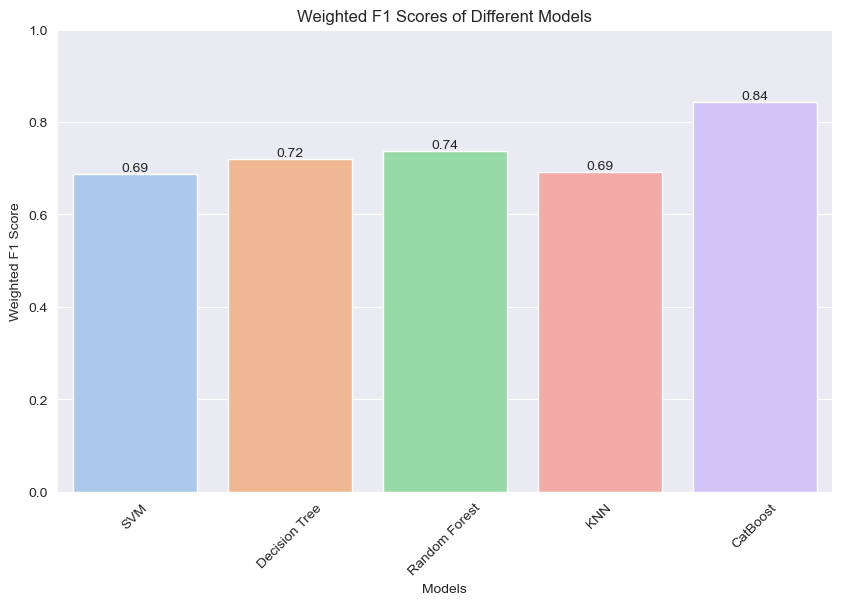

In [83]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=weighted_f1_scores, palette='pastel')
plt.xlabel('Models')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Scores of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  

for i, score in enumerate(weighted_f1_scores):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')
    
plt.show()

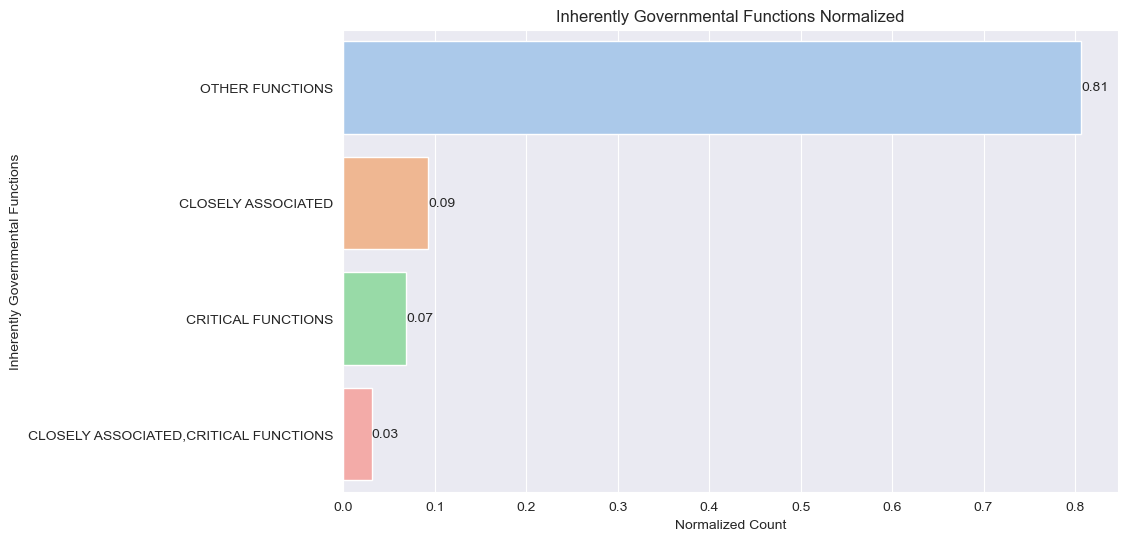

In [84]:
normalized_value_counts_dict = df['Inherently Governmental Functions'].value_counts(normalize = True).to_dict()
normalized_value_counts_dict

Y = list(normalized_value_counts_dict.keys())
X = list(normalized_value_counts_dict.values())
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=X, y=Y, palette='pastel')

for i, val in enumerate(X):
    ax.text(val, i, f'{val:.2f}', va='center', ha='left')

plt.xlabel('Normalized Count')
plt.ylabel('Inherently Governmental Functions')
plt.title('Inherently Governmental Functions Normalized')

plt.show()

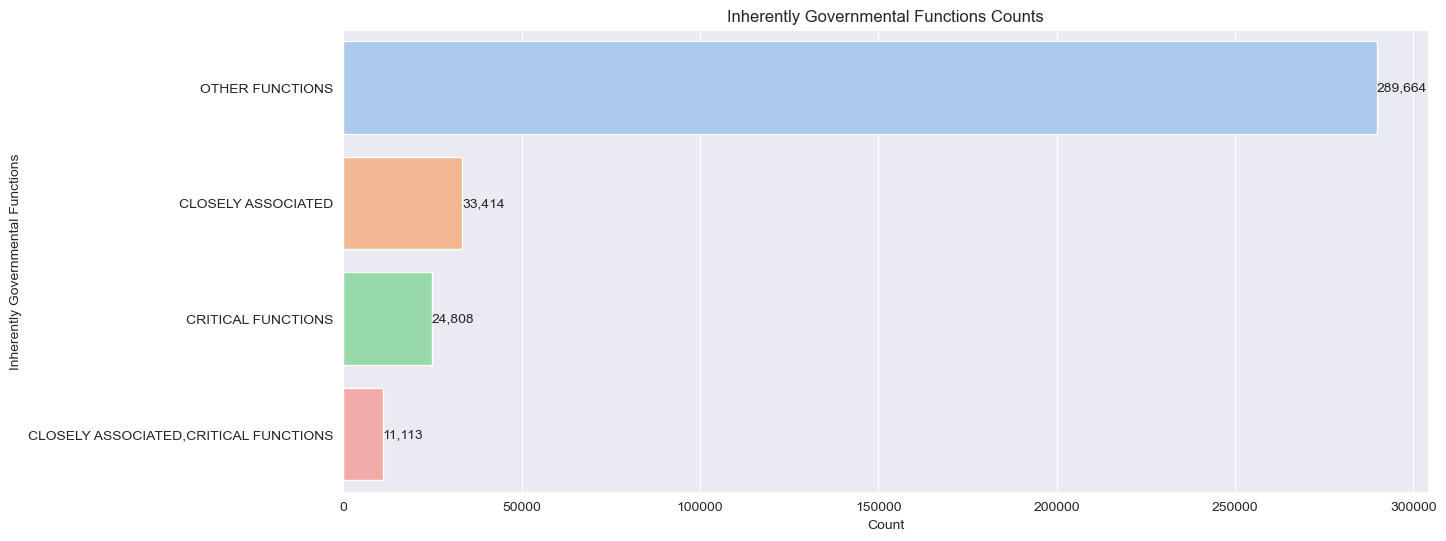

In [85]:
value_counts_dict = df['Inherently Governmental Functions'].value_counts().to_dict()


Y = list(value_counts_dict.keys())
X = list(value_counts_dict.values())
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=X, y=Y, palette='pastel')


for i, val in enumerate(X):
    ax.text(val, i, f'{val:,.0f}', va='center', ha='left')


plt.xlabel('Count')
plt.ylabel('Inherently Governmental Functions')
plt.title('Inherently Governmental Functions Counts')

plt.show()


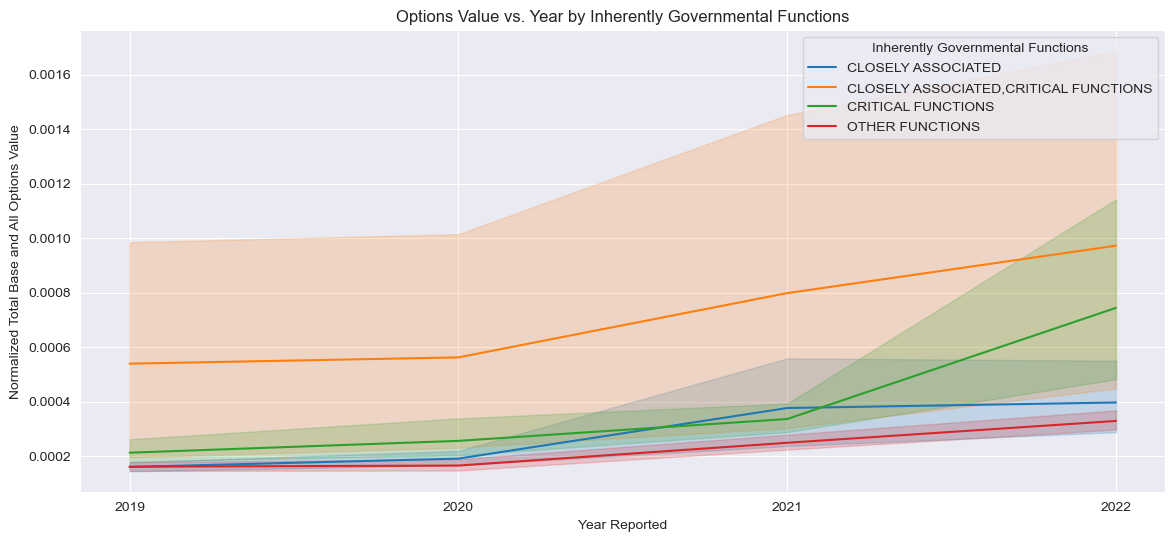

In [86]:
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=df, x='Year_Reported', y='normalized_Options_Value', hue='Inherently Governmental Functions')
plt.xlabel('Year Reported')
plt.ylabel('Normalized Total Base and All Options Value')
plt.title('Options Value vs. Year by Inherently Governmental Functions')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()